# ConvNet MNIST Tensorflow2

In [1]:
  %tensorflow_version 2.x
  import tensorflow as tf
  import numpy as np 
  import matplotlib.pyplot as plt 
  from sklearn.preprocessing import OneHotEncoder
  %matplotlib inline 


# 1. Import dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### Checking the data


(60000,)
(60000, 28, 28)
9


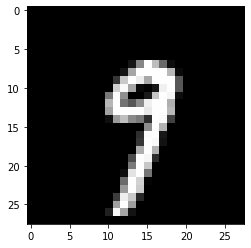

In [3]:
print(y_train.shape)
print(x_train.shape)
print(y_train[133])
imagedemo = x_train[133]
plt.imshow(imagedemo,cmap = 'gray')

### Preprocessing


In [4]:
# one hot enconding
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train),1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test),1)
y_test_onehot = onehot_encoder.fit_transform(y_test)
y_train_onehot.shape

(60000, 10)

# 2. Set up Architecture

### ConvNet functions

In [5]:
# doesn't reduce the image size
def conv2d(x,W,strides,padding,name = None):
  '''
    filters: window_size * depth * output_size 
  '''
  return tf.nn.conv2d(input = x,filters = W,strides = strides,padding = padding,name = name)

# reduce size of the image to the half 
def max_pool2d(x,ks,st):
  '''
    ksize = [batch,x,y,depth] ; filter size for maxpooling 
  '''
  return tf.nn.max_pool(input = x,ksize = ks,strides = st,padding = 'SAME')

In [6]:
class DNN_Model(object):
  def __init__(self,
               n_classes = 10):
    ''' First convolution kernel '''
    # (5,5,1) size of the conv window, 1 because is B&W
    # 32 is the size of the new dimention. it represents the number of filters
    self.hl1W = tf.Variable(np.random.rand(5,5,1,32),name = 'hl1weights',dtype = 'float32')
    self.hl1B = tf.Variable(np.random.rand(32),name = 'hl1bias', dtype = 'float32')
    
    ''' Second convolution kernel ''' 
    # (5,5,32) size of the conv window, 32 because is the current dimention
    # 64 is the size of the new dimention. it represents the number of filters
    self.hl2W = tf.Variable(np.random.rand(5,5,32,64),name = 'hl2weights',dtype = 'float32')
    self.hl2B = tf.Variable(np.random.rand(64),name = 'hl2bias', dtype = 'float32')

    ''' DNN '''
    self.hl3W = tf.Variable(np.random.rand(7 * 7 * 64, 1024),name = 'hl3weights',dtype = 'float32')
    self.hl3B = tf.Variable(np.random.rand(1024),name = 'hl3bias',dtype = 'float32')

    self.outW = tf.Variable(np.random.rand(1024,10),name = 'outweights', dtype = 'float32')
    self.outB = tf.Variable(np.random.rand(10),name = 'outbias', dtype = 'float32')
    
    self.trainable_variables = [self.hl1W,self.hl1B,self.hl2W,self.hl2B,self.hl3W,self.hl3B,self.outW,self.outB]

  def __call__(self,x):
    x = tf.cast(x,tf.float32)
    img = tf.reshape(x,shape=[-1,28 , 28, 1])
    # -1 correspond to the batch index, batch number is respeted by -1 value

    ''' Conv layers '''
    #stride = [batch_stride = 1 (image by image, without skip any),x,y,filter_stride = 1]
    #  => (28*28*1)
    l1 = conv2d(img,self.hl1W,[1,1,1,1],'SAME') 
    l1 = tf.add(l1,self.hl1B)
    l1 = tf.nn.relu(l1)
    l1 = max_pool2d(l1,[1,2,2,1],[1,2,2,1])
    # (14*14*32) =>

    # => (14*14*32)
    l2 = conv2d(l1,self.hl2W,[1,1,1,1],'SAME')
    l2 = tf.add(l2,self.hl2B)
    l2 = tf.nn.relu(l2)
    l2 = max_pool2d(l2,[1,2,2,1],[1,2,2,1])
    # (7*7*64) =>

    ''' Flatten '''
    l2 = tf.reshape(l2,[-1,7*7*64])

    ''' DNN ''' 
    l3 = tf.add(tf.matmul(l2,self.hl3W),self.hl3B)
    l3 = tf.nn.relu(l3)

    output = tf.add(tf.matmul(l3,self.outW),self.outB)

    return output

DNN = DNN_Model()   # model declaration
DNN(x_train[24:30]) # forward propagation

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[1.73788381e+11, 1.82537208e+11, 1.89222699e+11, 1.83482139e+11,
        1.77060348e+11, 1.79049038e+11, 1.79505365e+11, 1.82959948e+11,
        1.82869066e+11, 1.79857949e+11],
       [3.06972066e+11, 3.22445804e+11, 3.34207025e+11, 3.24107665e+11,
        3.12743690e+11, 3.16289253e+11, 3.17093577e+11, 3.23200942e+11,
        3.22984280e+11, 3.17695525e+11],
       [1.13032380e+11, 1.18727328e+11, 1.23080761e+11, 1.19337689e+11,
        1.15169370e+11, 1.16457275e+11, 1.16752409e+11, 1.18989734e+11,
        1.18967198e+11, 1.16992426e+11],
       [3.41313978e+11, 3.58483296e+11, 3.71595510e+11, 3.60357134e+11,
        3.47727462e+11, 3.51646908e+11, 3.52533217e+11, 3.59340442e+11,
        3.59096254e+11, 3.53232519e+11],
       [3.13743770e+11, 3.29572155e+11, 3.41587296e+11, 3.31286020e+11,
        3.19638798e+11, 3.23278668e+11, 3.24099572e+11, 3.30318774e+11,
        3.30111844e+11, 3.24719477e+11],
       [1.35164207e+11, 1.

# 3. Choose Optimizer & Metrics


In [7]:
''' Optimizer '''
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)

''' Metrics '''
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'test_accuracy')


# 4. Training & Testing


In [8]:
# compute gradient and adjust weights and biases 
@tf.function #compile
def train_step(model,data,labels):
  with tf.GradientTape() as tape: # memory to save gradients
    predictions = model(data)     # forward propagation
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels,predictions)) # compute error
  
  gradients = tape.gradient(loss,model.trainable_variables) #compute gradients with respect with 'trainable_variables'
  grads_and_vars_pairs = [(grad,model.trainable_variables[index]) for index,grad in enumerate(gradients)]
  optimizer.apply_gradients(grads_and_vars_pairs) # adjust weights and biases

  ''' compute metrics '''
  train_loss(loss)
  train_accuracy(labels,predictions)

In [9]:
@tf.function
def test_step(model,data,labels):
  predictions = model(data)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels,predictions))
  
  test_loss(loss)
  test_accuracy(labels,predictions)

In [10]:
def fitting(model,train_x,train_y,test_x,test_y,epochs,n_batch,batch_size):
  for epoch in range(epochs):
    i = 0
    while i + batch_size < len(train_x) or i + batch_size < batch_size * n_batch:
      start = i 
      end = i + batch_size 
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i += batch_size 
    test_step(model,test_x,test_y)
    template = 'Epoch {},Loss:{},Accuracy:{},Test Loss:{}, Test Accuracy:{}'
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          test_loss.result(),
                          test_accuracy.result() * 100))
    train_loss.reset_states() 
    train_accuracy.reset_states()
    
    test_loss.reset_states()
    test_accuracy.reset_states()

In [11]:
fitting(DNN,x_train,y_train_onehot,x_test,y_test_onehot,10,600,100)

Epoch 1,Loss:277404480.0,Accuracy:60.711185455322266,Test Loss:1322910.25, Test Accuracy:71.93000030517578
Epoch 2,Loss:928010.0625,Accuracy:73.46577453613281,Test Loss:538629.3125, Test Accuracy:74.98999786376953
Epoch 3,Loss:214721.671875,Accuracy:82.87979888916016,Test Loss:240383.359375, Test Accuracy:74.76000213623047
Epoch 4,Loss:59510.87109375,Accuracy:87.82137298583984,Test Loss:36335.37890625, Test Accuracy:89.1300048828125
Epoch 5,Loss:21549.5390625,Accuracy:90.99665832519531,Test Loss:17452.88671875, Test Accuracy:90.01000213623047
Epoch 6,Loss:10263.2197265625,Accuracy:92.54090118408203,Test Loss:7322.0576171875, Test Accuracy:93.69000244140625
Epoch 7,Loss:6070.01611328125,Accuracy:93.7228775024414,Test Loss:5052.68798828125, Test Accuracy:94.18000030517578
Epoch 8,Loss:4206.89892578125,Accuracy:94.34056854248047,Test Loss:3888.464111328125, Test Accuracy:94.73999786376953
Epoch 9,Loss:2966.377197265625,Accuracy:94.97161865234375,Test Loss:2668.124755859375, Test Accuracy: